<a href="https://colab.research.google.com/github/HaneenEzzat/Face-Recognition-Image-Processing-Project-/blob/main/Copy_of_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import kagglehub
import pandas as pd
import tarfile
from google.colab import files
import shutil

In [ ]:
# Download latest version
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lfwpeople


In [ ]:
os.listdir(path)

['pairsDevTrain.txt', 'lfw-funneled.tgz', 'pairsDevTest.txt', 'pairs.txt']

In [ ]:
# Path to the archive
archive_path = "/kaggle/input/lfwpeople/lfw-funneled.tgz"
extract_path = "/kaggle/working/lfw-funneled"

# Extract the archive
if not os.path.exists(extract_path):
    with tarfile.open(archive_path, "r:gz") as tar:
        tar.extractall(path=extract_path)
    print("Extraction completed.")
else:
    print("Archive already extracted.")

Archive already extracted.


In [ ]:
sample_dir = os.path.join(extract_path, "lfw_funneled")
for root, dirs, files in os.walk(sample_dir):
    for file in files:
        if file.endswith((".jpg", ".png", ".tif")):
            sample_image_path = os.path.join(root, file)
            print(f"Sample image found: {sample_image_path}")
            break
    break  # only check the top directory layer

#1.Color Adjustment

In [ ]:

def adjust_brightness_contrast(image, brightness=30, contrast=30):
    return cv2.convertScaleAbs(image, alpha=1 + contrast / 127., beta=brightness)

# 2. Filtering

In [ ]:
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

#3. Edge Detection

In [ ]:
def canny_edge_detection(image, low_threshold=100, high_threshold=200):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray, low_threshold, high_threshold)

#4. Noise Reduction

In [ ]:
def denoise_image(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# 5. Feature Extraction

In [ ]:
def extract_orb_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    return cv2.drawKeypoints(image, keypoints, None, color=(0,255,0)), descriptors

# 6. Image Processing Pipeline

In [ ]:
def process_image(image, image_name, output_dir):
    try:
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        adjusted = adjust_brightness_contrast(image)
        blurred = apply_gaussian_blur(adjusted)
        edges = canny_edge_detection(blurred)
        denoised = denoise_image(adjusted)
        features_img, _ = extract_orb_features(denoised)

        # Save each step
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_adjusted.jpg"), adjusted)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_blurred.jpg"), blurred)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_edges.jpg"), edges)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_denoised.jpg"), denoised)
        cv2.imwrite(os.path.join(output_dir, f"{image_name}_features.jpg"), features_img)

        print(f"Saved results for: {image_name}")

        return {
            "Original": image,
            "Brightness & Contrast": adjusted,
            "Gaussian Blur": blurred,
            "Canny Edges": edges,
            "Denoised": denoised,
            "ORB Features": features_img
        }

    except Exception as e:
        print(f"[Error] Failed to process image {image_name}: {e}")
        return None


#7. Visualization

In [ ]:
def show_results(results_dict):
    titles = list(results_dict.keys())
    images = list(results_dict.values())

    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 3, i + 1)
        if len(images[i].shape) == 2:  # grayscale (Canny)
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()




# 8. Main

In [ ]:
def main():
    archive_path = "/kaggle/input/lfwpeople/lfw-funneled.tgz"
    extract_path = "/kaggle/working/lfw-funneled"
    output_dir = 'processed_images'

    processed_count = 0
    max_images = 3

    for root, _, files in os.walk(extract_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                image_name = os.path.splitext(file)[0]

                print(f"\nProcessing: {image_path}")

                try:
                    image = cv2.imread(image_path)
                    if image is None:
                        raise ValueError("Image could not be read.")

                    results = process_image(image, image_name, output_dir)
                    if results:
                        show_results(results)
                        processed_count += 1
                        if processed_count >= max_images:
                            return

                except Exception as e:
                    print(f"[Error] Failed to load/process image {file}: {e}")



Processing: /kaggle/working/lfw-funneled/lfw_funneled/Mike_Miller/Mike_Miller_0002.jpg
Saved results for: Mike_Miller_0002


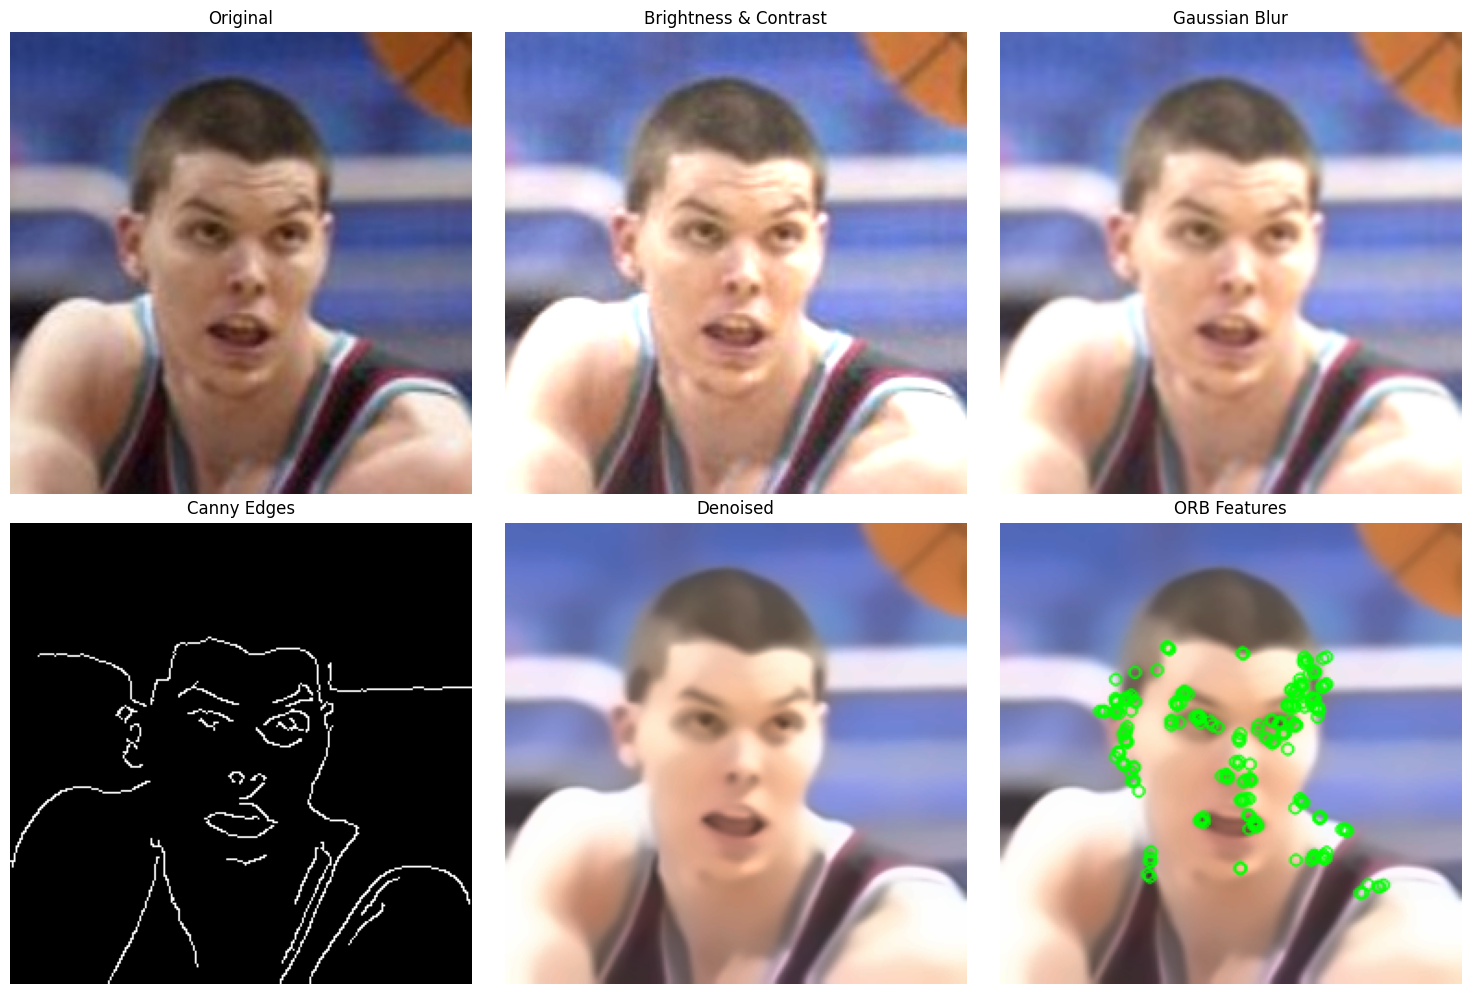


Processing: /kaggle/working/lfw-funneled/lfw_funneled/Mike_Miller/Mike_Miller_0001.jpg
Saved results for: Mike_Miller_0001


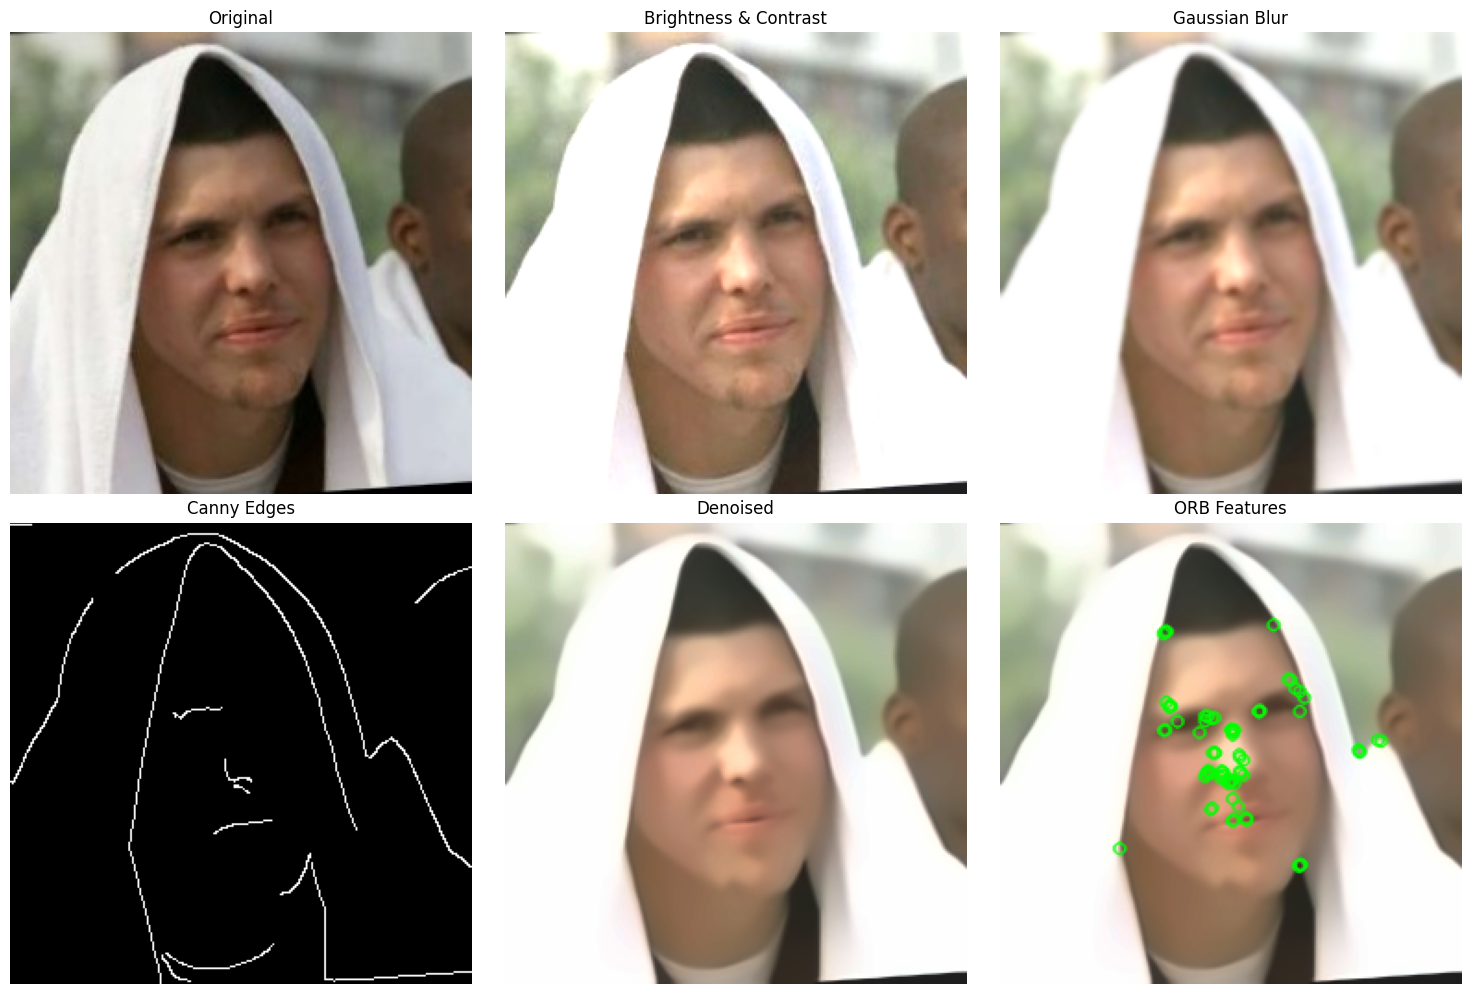


Processing: /kaggle/working/lfw-funneled/lfw_funneled/Francis_Ricciardone/Francis_Ricciardone_0001.jpg
Saved results for: Francis_Ricciardone_0001


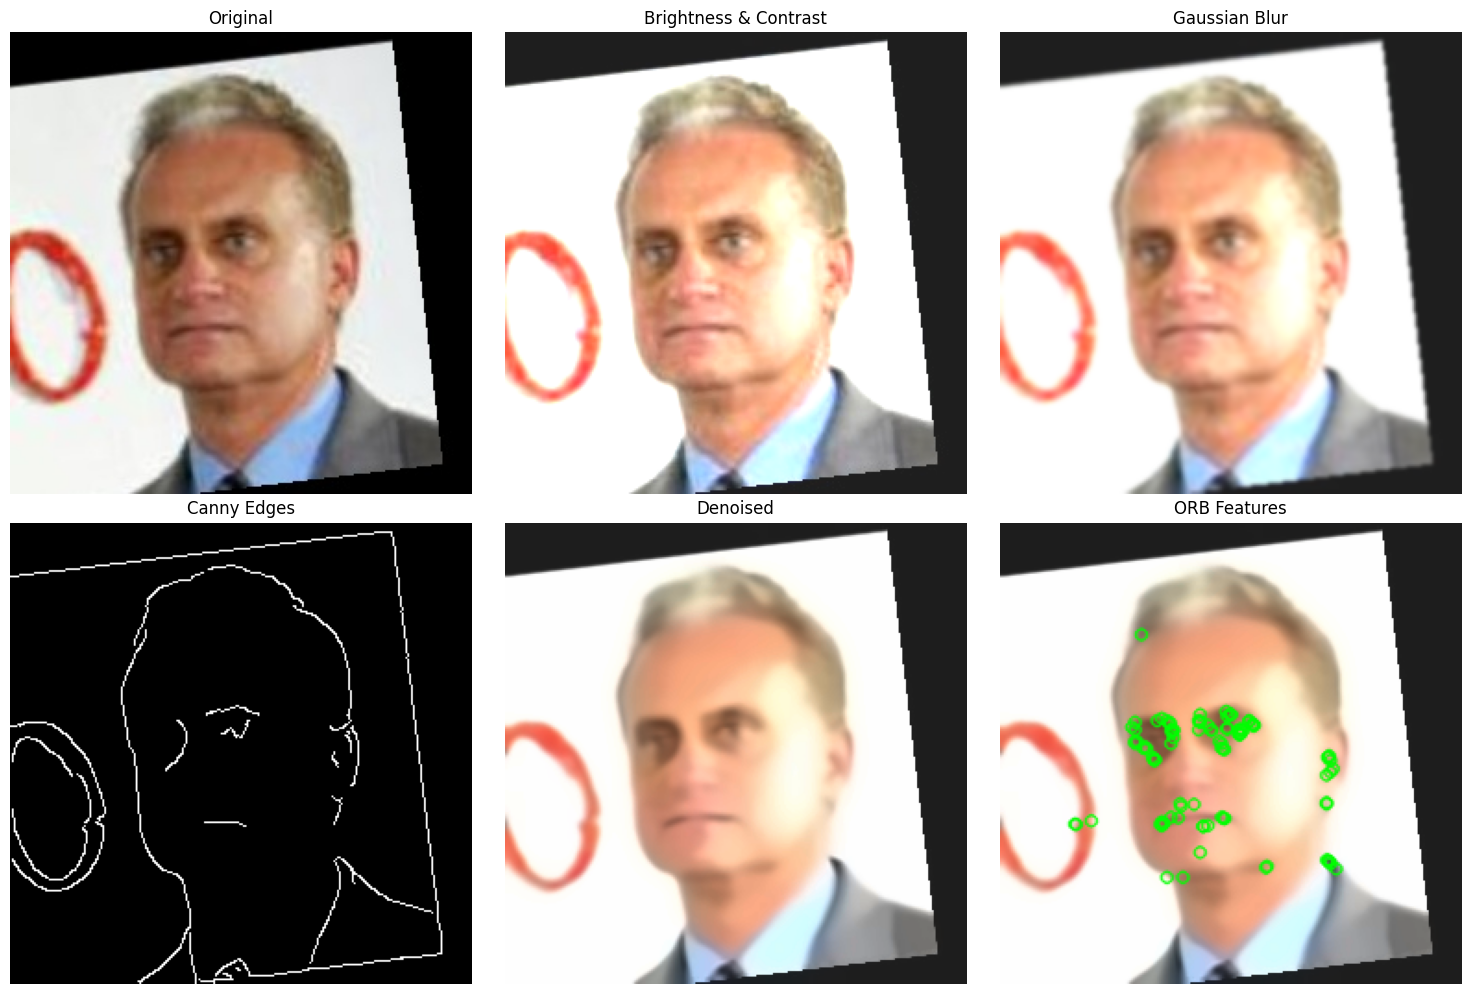

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
output_dir = 'processed_images'

if os.path.exists(output_dir):
    print("Saved files in folder:")
    for file in os.listdir(output_dir):
        print(" -", file)
else:
    print("Folder not found.")


Saved files in folder:
 - Mike_Miller_0002_edges.jpg
 - Francis_Ricciardone_0001_features.jpg
 - Mike_Miller_0001_features.jpg
 - Mike_Miller_0002_features.jpg
 - Francis_Ricciardone_0001_blurred.jpg
 - Mike_Miller_0002_adjusted.jpg
 - Francis_Ricciardone_0001_denoised.jpg
 - Mike_Miller_0001_blurred.jpg
 - Francis_Ricciardone_0001_adjusted.jpg
 - Mike_Miller_0001_edges.jpg
 - Mike_Miller_0001_adjusted.jpg
 - Francis_Ricciardone_0001_edges.jpg
 - Mike_Miller_0001_denoised.jpg
 - Mike_Miller_0002_blurred.jpg
 - Mike_Miller_0002_denoised.jpg


In [ ]:
shutil.make_archive('processed_images', 'zip', output_dir)
files.download('processed_images.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>